In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
A = np.random.randint(10, 50, size=(3, 5))

A

array([[33, 33, 16, 33, 10],
       [48, 22, 35, 39, 30],
       [13, 36, 43, 36, 16]])

In [6]:
# Calculate the mean, median, and standard deviation of the array A
mean_value = A.mean()       # Mean of the array
median_value = np.median(A) # Median of the array
std_value = A.std()         # Standard deviation of the array

mean_value, median_value, std_value

(29.533333333333335, 33.0, 11.074695882456046)

In [8]:
# Normalize the array so that all values are between 0 and 1
normalized_A = (A - A.min()) / (A.max() - A.min())

normalized_A


array([[0.60526316, 0.60526316, 0.15789474, 0.60526316, 0.        ],
       [1.        , 0.31578947, 0.65789474, 0.76315789, 0.52631579],
       [0.07894737, 0.68421053, 0.86842105, 0.68421053, 0.15789474]])

In [9]:
X = np.array([1, 2, 3])
Y = np.array([[10], [20], [30]])

multi = np.multiply(X, Y) 
multi

array([[10, 20, 30],
       [20, 40, 60],
       [30, 60, 90]])

In [20]:
df = pd.read_csv('employees.csv')
df.head()

,EmployeeID,Name,Department,Salary,JoiningDate
0,1,John Doe,Data Science,75000.0,2021-03-15
1,2,Jane Smith,Marketing,65000.0,2019-11-10
2,3,Bob Johnson,Data Science,80000.0,2022-06-01
3,4,Alice Williams,Human Resources,NaN,2020-01-20
4,5,Chris Brown,Engineering,90000.0,2018-05-30


In [21]:
# Display the first five rows and get basic statistics of numerical columns.

# Calculate statistics for the "Salary" column (numerical column)
mean_value = df["Salary"].mean()  # Mean of the Salary column
median_value = np.median(df["Salary"].dropna())  # Median of the Salary column (excluding NaN)
std_value = df["Salary"].std()  # Standard deviation of the Salary column
variance_value = df["Salary"].var()  # Variance of the Salary column

# Display the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_value}")
print(f"Variance: {variance_value}")

Mean: 71666.66666666667
Median: 72500.0
Standard Deviation: 13662.601021279464
Variance: 186666666.66666666


In [23]:
df['JoiningDate'] = pd.to_datetime(df['JoiningDate'])

# Filter for employees who joined after January 1, 2020, and are in the 'Data Science' department
filtered_df = df[(df['JoiningDate'] > '2020-01-01') & (df['Department'] == 'Data Science')]

print(filtered_df)

   EmployeeID         Name    Department   Salary JoiningDate
0           1     John Doe  Data Science  75000.0  2021-03-15
2           3  Bob Johnson  Data Science  80000.0  2022-06-01
5           6  Emily Davis  Data Science  70000.0  2023-02-15


##  (b) Data Aggregation and Grouping (10 Marks)

In [24]:
# Calculate the average salary for each department.  
mean_value = df["Salary"].mean()  # Mean of the Salary column
mean_value

71666.66666666667

In [26]:
#  Identify the department with the highest number of employees. 

department_counts = df['Department'].value_counts()  # Count the number of employees per department
top_department = department_counts.idxmax()          # Get the department name with the highest count
top_department_count = department_counts.max()       # Get the highest count of employees

print(f"The department with the highest number of employees is '{top_department}' with {top_department_count} employees.")

The department with the highest number of employees is 'Data Science' with 3 employees.


In [31]:
# missing value with median. 

df['Salary'] = df['Salary'].fillna(df['Salary'].median()) 
df.head()

,EmployeeID,Name,Department,Salary,JoiningDate
0,1,John Doe,Data Science,75000.0,2021-03-15
1,2,Jane Smith,Marketing,65000.0,2019-11-10
2,3,Bob Johnson,Data Science,80000.0,2022-06-01
3,4,Alice Williams,Human Resources,72500.0,2020-01-20
4,5,Chris Brown,Engineering,90000.0,2018-05-30


In [17]:
# Convert JoiningDate to datetime
df['JoiningDate'] = pd.to_datetime(df['JoiningDate'], errors='coerce')
df['Month'] = df['JoiningDate'].dt.month
df['Day'] = df['JoiningDate'].dt.day
df['Year'] = df['JoiningDate'].dt.year
df.drop(columns=['JoiningDate'], inplace=True)

In [18]:
df.head()

,EmployeeID,Name,Department,Salary,Month,Day,Year
0,1,John Doe,Data Science,75000.0,3,15,2021
1,2,Jane Smith,Marketing,65000.0,11,10,2019
2,3,Bob Johnson,Data Science,80000.0,6,1,2022
3,4,Alice Williams,Human Resources,NaN,1,20,2020
4,5,Chris Brown,Engineering,90000.0,5,30,2018


##  Question 6: Hands-On Project (15 Marks)

#### You are given a dataset 
- sales_data.csv containing daily sales records with the following columns: 'Date' , 'ProductID' , Tasks:'QuantitySold' , 'Revenue' .
     - Load the dataset into a Pandas DataFrame. (2 Marks)
     - Convert the 'Date' column to datetime objects and set it as the index. (3 Marks)
     - Resample the data to get monthly total revenue and plot it using Matplotlib. (5 Marks)
     - Identify the top 3 products with the highest total sales revenue and visualize the results using a Seaborn bar plot. (5 Marks)

In [32]:
df1 = pd.read_csv('sales_data.csv')
df1.head()

,Date,ProductID,QuantitySold,Revenue
0,2024-01-01,101,20,2000
1,2024-01-01,102,15,1500
2,2024-01-02,103,10,1000
3,2024-01-02,101,25,2500
4,2024-01-03,104,30,3000


In [33]:
# Convert the 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Set the 'Date' column as the index
df1.set_index('Date', inplace=True)

# Display the DataFrame with the updated index
print(df1.head())

            ProductID  QuantitySold  Revenue
Date                                        
2024-01-01        101            20     2000
2024-01-01        102            15     1500
2024-01-02        103            10     1000
2024-01-02        101            25     2500
2024-01-03        104            30     3000


C:\Users\User\AppData\Local\Temp\ipykernel_2816\239116890.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df1['Revenue'].resample('M').sum()


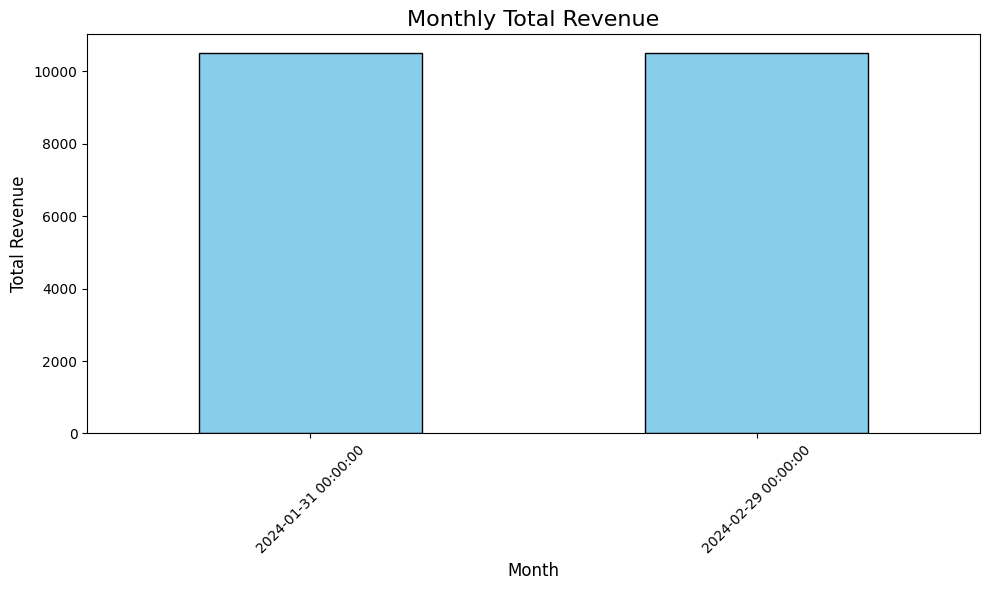

In [35]:
# Resample the data by month and calculate total revenue
monthly_revenue = df1['Revenue'].resample('M').sum()

# Plot the monthly revenue
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Monthly Total Revenue', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2816\1749895586.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_products.index, y=top_3_products.values, palette='viridis')


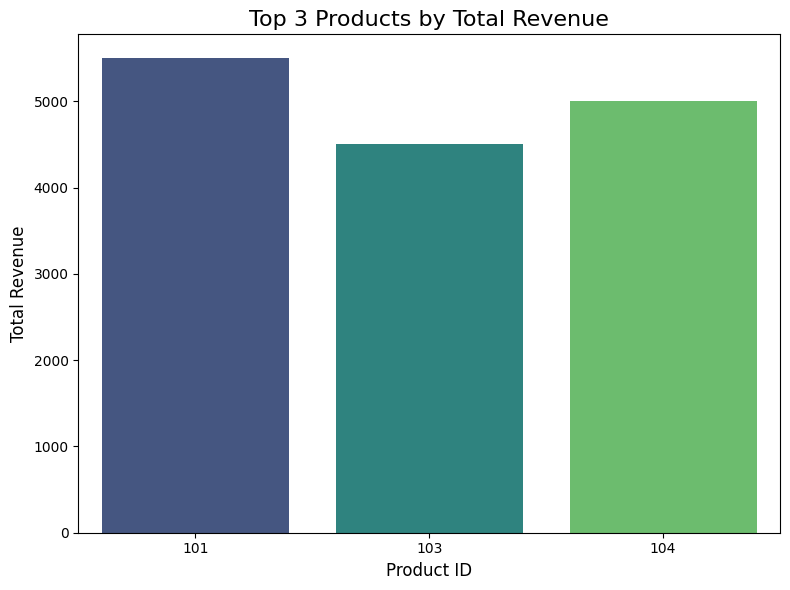

In [36]:
# Group by 'ProductID' and calculate total revenue for each product
product_revenue = df1.groupby('ProductID')['Revenue'].sum()

# Sort by revenue in descending order and get the top 3 products
top_3_products = product_revenue.nlargest(3)

# Plot the top 3 products using a Seaborn bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_3_products.index, y=top_3_products.values, palette='viridis')
plt.title('Top 3 Products by Total Revenue', fontsize=16)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.tight_layout()
plt.show()

 ## Question 7: Capstone Coding Challenge (Bonus Question - Optional) (10 Marks)

In [37]:
df2 = pd.read_csv('weather_data.csv')
df2.head()

,Date,Temperature,Humidity,WindSpeed
0,2024-01-01,25,60,10
1,2024-01-02,24,62,12
2,2024-01-03,23,65,11
3,2024-01-04,22,63,14
4,2024-01-05,21,61,13


In [38]:
df2['Date'] = pd.to_datetime(df2['Date'])

print(df2.head())

        Date  Temperature  Humidity  WindSpeed
0 2024-01-01           25        60         10
1 2024-01-02           24        62         12
2 2024-01-03           23        65         11
3 2024-01-04           22        63         14
4 2024-01-05           21        61         13


In [39]:
# Calculate the moving average of the temperature over a 7-day window

# Set the 'Date' column as the index
df2.set_index('Date', inplace=True)

# Calculate the 7-day moving average for the 'Temperature' column
df2['Temperature_MA'] = df2['Temperature'].rolling(window=7).mean()

# Display the DataFrame with the new column
print(df2.head(10))  # Show more rows to see the moving average

            Temperature  Humidity  WindSpeed  Temperature_MA
Date                                                        
2024-01-01           25        60         10             NaN
2024-01-02           24        62         12             NaN
2024-01-03           23        65         11             NaN
2024-01-04           22        63         14             NaN
2024-01-05           21        61         13             NaN
2024-01-06           20        60         12             NaN
2024-01-07           19        58         15       22.000000
2024-01-08           20        59         14       21.285714
2024-01-09           21        60         13       20.857143
2024-01-10           22        62         12       20.714286


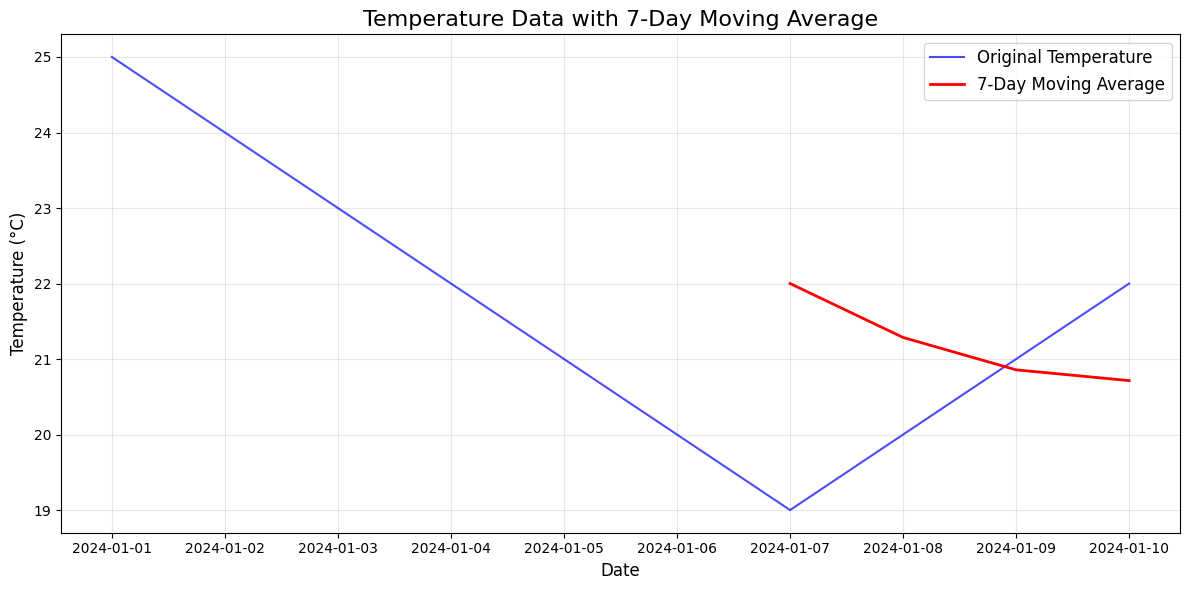

In [40]:
# Plot both the original temperature data and the 7-day moving average
plt.figure(figsize=(12, 6))

# Original temperature data
plt.plot(df2.index, df2['Temperature'], label='Original Temperature', color='blue', alpha=0.7)

# Moving average temperature data
plt.plot(df2.index, df2['Temperature_MA'], label='7-Day Moving Average', color='red', linewidth=2)

# Add labels, title, and legend
plt.title('Temperature Data with 7-Day Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

# SET -02

In [41]:
#  Question 3: NumPy Array Operations (15 Marks)
# (a) Array Creation and Indexing (8 Marks)

In [44]:
arrary = np.random.randint(1, 100, size=(5,5))
arrary

array([[ 7, 75, 95, 60, 83],
       [16, 67, 18, 62, 31],
       [93, 30, 16,  1, 26],
       [98, 14,  1, 47, 33],
       [ 1, 74, 15, 63, 32]])

In [45]:
arrary[arrary % 2 == 0] = 0
arrary

array([[ 7, 75, 95,  0, 83],
       [ 0, 67,  0,  0, 31],
       [93,  0,  0,  1,  0],
       [ 0,  0,  1, 47, 33],
       [ 1,  0, 15, 63,  0]])

In [49]:
# Calculate the sum of all numbers in each column
# axis=0 means column-wise: Sum the elements vertically down each column.
# axis=1 would mean row-wise: Sum the elements horizontally across each row.

column_sums = arrary.sum(axis=0)
row_sums = arrary.sum(axis=1)

print(column_sums)
print(row_sums)

[101 142 111 111 147]
[260  98  94  81  79]


###  (b) Array Reshaping and Mathematical Operations.
 - Reshape the array into a (4, 3) matrix. (2 Marks)
 - Compute the natural logarithm of each element in the reshaped matrix. (3 Marks)
 - Flatten the matrix back into a one-dimensional array. (2 Marks)

In [51]:
array = np.arange(1, 13)
array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [52]:
reshape_array = array.reshape(4, 3)
reshape_array

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [53]:
column_log = np.log(array)
column_log

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509,
       2.39789527, 2.48490665])

In [54]:
flatten_array = array.flatten()
flatten_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

## Question 4: Data Analysis with Pandas (25 Marks)

In [55]:
df3 = pd.read_csv('sales.csv')
df3.head()

,OrderID,Product,Category,Quantity,UnitPrice,OrderDate
0,101,Laptop,Electronics,2,1000,2022-01-15
1,102,Smartphone,Electronics,3,800,2022-02-20
2,103,Tablet,Electronics,1,400,2022-03-15
3,104,Laptop,Electronics,5,1000,2023-01-10
4,105,Smartphone,Electronics,2,800,2023-02-05


In [56]:
# Check for missing values
missing_values = df3[['Quantity', 'UnitPrice']].isnull().sum()
print("Missing values before handling:\n", missing_values)

# Fill missing values with zero or the column median (choice depends on data context)
df3['Quantity'] = df3['Quantity'].fillna(0)
df3['UnitPrice'] = df3['UnitPrice'].fillna(df3['UnitPrice'].median())

# Verify no missing values remain
print("Missing values after handling:\n", df3[['Quantity', 'UnitPrice']].isnull().sum())


Missing values before handling:
 Quantity     0
UnitPrice    0
dtype: int64
Missing values after handling:
 Quantity     0
UnitPrice    0
dtype: int64


In [57]:
# Convert 'OrderDate' to datetime
df3['OrderDate'] = pd.to_datetime(df3['OrderDate'])

# Extract the year into a new column 'Year'
df3['Year'] = df3['OrderDate'].dt.year

# Display the updated DataFrame
print(df3.head())


   OrderID     Product     Category  Quantity  UnitPrice  OrderDate  Year
0      101      Laptop  Electronics         2       1000 2022-01-15  2022
1      102  Smartphone  Electronics         3        800 2022-02-20  2022
2      103      Tablet  Electronics         1        400 2022-03-15  2022
3      104      Laptop  Electronics         5       1000 2023-01-10  2023
4      105  Smartphone  Electronics         2        800 2023-02-05  2023


### (b) Data Manipulation and Analysis (10 Marks)

In [58]:
# Calculate TotalSales
df3['TotalSales'] = df3['Quantity'] * df3['UnitPrice']

# Display the DataFrame with the new column
print(df3.head())


   OrderID     Product     Category  Quantity  UnitPrice  OrderDate  Year  \
0      101      Laptop  Electronics         2       1000 2022-01-15  2022   
1      102  Smartphone  Electronics         3        800 2022-02-20  2022   
2      103      Tablet  Electronics         1        400 2022-03-15  2022   
3      104      Laptop  Electronics         5       1000 2023-01-10  2023   
4      105  Smartphone  Electronics         2        800 2023-02-05  2023   

   TotalSales  
0        2000  
1        2400  
2         400  
3        5000  
4        1600  


In [59]:
# top 3 products in dataset.
# Group by 'Product' and sum the 'TotalSales'
product_sales = df3.groupby('Product')['TotalSales'].sum()

# Sort in descending order and get the top 3 products
top_3_products = product_sales.sort_values(ascending=False).head(3)

# Display the top 3 products
print("Top 3 products by total sales:\n", top_3_products)

Top 3 products by total sales:
 Product
Laptop        7000
Smartphone    4000
Tablet        2000
Name: TotalSales, dtype: int64


In [60]:
# Group by 'Category' and calculate the average 'UnitPrice'
average_unit_price = df3.groupby('Category')['UnitPrice'].mean()

# Display the average unit price for each category
print("Average unit price by category:\n", average_unit_price)


Average unit price by category:
 Category
Electronics    733.333333
Name: UnitPrice, dtype: float64


### (c) Advanced Filtering (5 Marks)

In [61]:
# Apply the filtering conditions
filtered_df = df3[(df3['Year'] == 2022) & 
                  (df3['Category'] == 'Electronics') & 
                  (df3['Quantity'] > 5)]

# Display the filtered DataFrame
print("Filtered DataFrame:\n", filtered_df)


Filtered DataFrame:
 Empty DataFrame
Columns: [OrderID, Product, Category, Quantity, UnitPrice, OrderDate, Year, TotalSales]
Index: []


In [62]:
# Finall code. 
import pandas as pd

# Load the dataset
df3 = pd.read_csv('sales.csv')

# Check and handle missing values
df3['Quantity'] = df3['Quantity'].fillna(0)
df3['UnitPrice'] = df3['UnitPrice'].fillna(df3['UnitPrice'].median())

# Convert 'OrderDate' to datetime and extract 'Year'
df3['OrderDate'] = pd.to_datetime(df3['OrderDate'])
df3['Year'] = df3['OrderDate'].dt.year

# Calculate total sales
df3['TotalSales'] = df3['Quantity'] * df3['UnitPrice']

# Top 3 products by total sales
product_sales = df3.groupby('Product')['TotalSales'].sum()
top_3_products = product_sales.sort_values(ascending=False).head(3)

# Average unit price by category
average_unit_price = df3.groupby('Category')['UnitPrice'].mean()

# Filtered DataFrame
filtered_df = df3[(df3['Year'] == 2022) & 
                  (df3['Category'] == 'Electronics') & 
                  (df3['Quantity'] > 5)]

# Display results
print("Top 3 products by total sales:\n", top_3_products)
print("Average unit price by category:\n", average_unit_price)
print("Filtered DataFrame:\n", filtered_df)


Top 3 products by total sales:
 Product
Laptop        7000
Smartphone    4000
Tablet        2000
Name: TotalSales, dtype: int64
Average unit price by category:
 Category
Electronics    733.333333
Name: UnitPrice, dtype: float64
Filtered DataFrame:
 Empty DataFrame
Columns: [OrderID, Product, Category, Quantity, UnitPrice, OrderDate, Year, TotalSales]
Index: []


# Set- 03

## Question 3: NumPy Arrays and Operations 

#### (a) Array Creation and Indexing (8 Marks)
 - Create a NumPy array of shape (6, 6) with random integers between 1 and 100. (2 Marks)
 - Extract the subarray consisting of rows 2 to 4 and columns 3 to 5. (3 Marks)
 - Calculate the maximum, minimum, and mean values of the extracted subarray. (3 Marks)

In [4]:
arrary = np.random.randint(1, 100, size=(6, 6))
arrary

array([[83, 15,  5, 63, 16, 97],
       [88, 32, 46,  8, 29, 65],
       [24, 94, 66, 92, 69, 64],
       [56, 45, 55, 60, 20, 57],
       [80, 51, 22, 62, 97, 16],
       [89, 14, 38, 26, 65, 86]])

In [5]:
import numpy as np

# Create a NumPy array of shape (6, 6) with random integers between 1 and 100
array = np.random.randint(1, 101, size=(6, 6))

# Rows 2 to 4 corresponds to indices 1:4 (inclusive start, exclusive end).
# Columns 3 to 5 corresponds to indices 2:5.

# Extract the subarray consisting of rows 2 to 4 and columns 3 to 5
subarray = array[1:4, 2:5]

# Display the original array and the extracted subarray
array, subarray

(array([[61, 31, 46, 45,  5, 99],
        [86, 91, 99, 28, 64, 96],
        [24, 37, 44, 85, 76, 40],
        [87, 18, 92, 34, 59, 66],
        [50, 34, 64, 88, 72, 14],
        [35, 28, 48, 18, 40, 68]]),
 array([[99, 28, 64],
        [44, 85, 76],
        [92, 34, 59]]))

In [6]:
mean_value = subarray.mean()
max_value = subarray.max()
min_value = subarray.min()

mean_value, max_value, min_value

(64.55555555555556, 99, 28)

### (b) Mathematical Operations and Broadcasting (7 Marks)

- Use broadcasting to subtract array B from each row of array 
- Compute the element-wise square of the result. (3 Marks)

In [10]:
import numpy as np

# Define arrays A and B
A = np.array([[2, 4, 6], [8, 10, 12]])
B = np.array([1, 2, 3])

# Perform broadcasting and element-wise multiplication
broadcasts = np.multiply(A, B)
print("Broadcasted Result:\n", broadcasts)

# Compute element-wise square
element_wise_square = broadcasts ** 2
print("Element-wise Square:\n", element_wise_square)

Broadcasted Result:
 [[ 2  8 18]
 [ 8 20 36]]
Element-wise Square:
 [[   4   64  324]
 [  64  400 1296]]


## Question 4: Data Analysis with Pandas (25 Marks)

- Load the dataset into a Pandas DataFrame. (2 Marks)
- Convert the 'EmployeeID' , 'JoiningDate' column to datetime format. (2 Marks)
- Add a new column 'Name' , 'Department' ,'Experience' that calculates the number of years the employee has been with the 
company as of today's date. (6 Marks)

In [11]:
df4 = pd.read_csv('employees.csv')
df4.head()

,EmployeeID,Name,Department,Salary,JoiningDate
0,1,John Doe,Data Science,75000.0,2021-03-15
1,2,Jane Smith,Marketing,65000.0,2019-11-10
2,3,Bob Johnson,Data Science,80000.0,2022-06-01
3,4,Alice Williams,Human Resources,NaN,2020-01-20
4,5,Chris Brown,Engineering,90000.0,2018-05-30


In [12]:
df4['EmployeeID'] = pd.to_datetime(df4['EmployeeID'])
df4['JoiningDate'] = pd.to_datetime(df4['JoiningDate'])
df4.head()

,EmployeeID,Name,Department,Salary,JoiningDate
0,1970-01-01 00:00:00.000000001,John Doe,Data Science,75000.0,2021-03-15
1,1970-01-01 00:00:00.000000002,Jane Smith,Marketing,65000.0,2019-11-10
2,1970-01-01 00:00:00.000000003,Bob Johnson,Data Science,80000.0,2022-06-01
3,1970-01-01 00:00:00.000000004,Alice Williams,Human Resources,NaN,2020-01-20
4,1970-01-01 00:00:00.000000005,Chris Brown,Engineering,90000.0,2018-05-30


In [15]:
import pandas as pd
from datetime import datetime

# Convert 'JoiningDate' to datetime format
df4['JoiningDate'] = pd.to_datetime(df4['JoiningDate'])

# Calculate the number of years with the company
df4['Experience'] = datetime.now().year - df4['JoiningDate'].dt.year

# Display the relevant columns
print(df4[['EmployeeID', 'Name', 'Department', 'Experience']])

   EmployeeID            Name       Department  Experience
0           1        John Doe     Data Science           3
1           2      Jane Smith        Marketing           5
2           3     Bob Johnson     Data Science           2
3           4  Alice Williams  Human Resources           4
4           5     Chris Brown      Engineering           6
5           6     Emily Davis     Data Science           1
6           7  Michael Wilson            Sales           7


### b) Data Manipulation and Analysis (10 Marks)
 - Using the DataFrame from part (a):
     - Filter the DataFrame to include only employees from the 'IT' and 'HR' departments with a salary greater than $70,000. (5 Marks)
     - Group the filtered data by 'Department' and calculate the average 'Salary' . (5 Marks)

In [16]:
import pandas as pd

# Assuming df4 is already loaded from part (a)

# Filter the DataFrame for employees in 'IT' and 'Human Resources' with a salary > 70,000
filtered_df = df4[(df4['Department'].isin(['IT', 'Human Resources'])) & (df4['Salary'] > 70000)]

# Group by 'Department' and calculate the average 'Salary'
average_salary = filtered_df.groupby('Department')['Salary'].mean()

# Display results
print("Filtered DataFrame:\n", filtered_df)
print("\nAverage Salary by Department:\n", average_salary)

Filtered DataFrame:
 Empty DataFrame
Columns: [EmployeeID, Name, Department, Salary, JoiningDate, Experience]
Index: []

Average Salary by Department:
 Series([], Name: Salary, dtype: float64)


### (c) Data Exporting (5 Marks)
- Export the grouped data from part (b) to a new CSV file named 
- Ensure that the index is not included in the output file.

In [ ]:
import pandas as pd

# Load the dataset
df4 = pd.read_csv('employees.csv')

# Strip any leading/trailing spaces in the 'Department' column
df4['Department'] = df4['Department'].str.strip()

# Filter for 'IT' and 'Human Resources' with salary > 70000
filtered_df = df4[(df4['Department'].isin(['IT', 'Human Resources'])) & (df4['Salary'] > 70000)]

# Group by 'Department' and calculate the average 'Salary'
average_salary = filtered_df.groupby('Department')['Salary'].mean()

# Export the grouped data to a new CSV file without the index
average_salary.to_csv('average_salary.csv', index=False)

print("Filtered DataFrame:\n", filtered_df)
print("\nAverage Salary by Department:\n", average_salary)
print("\nData has been successfully exported to 'average_salary.csv'")

# Question 6: Working with Pandas and External Data 

### Load both sheets into separate Pandas DataFrames and combine them into a single DataFrame.(4 Marks)
- Add a new column 'TotalSales' calculated as 'Quantity' * 'UnitPrice' . (2 Marks)
- Find the top 5 products with the highest total sales across both years. (4 Marks)
- Using Matplotlib, plot a line chart showing the monthly total sales for the product with the
 highest sales. Include labels, title, and legend. (5 Marks)

In [17]:
df5 = pd.read_excel('sales_data.xlsx')
df5.head()

,Date,Region,Product,Quantity,UnitPrice
0,2022-01-10,North,Laptop,5,1000
1,2022-02-15,South,Tablet,10,500
2,2022-03-20,East,Smartphone,15,800
3,2022-04-25,West,Laptop,20,1000
4,2022-05-30,Central,Tablet,8,500


Top 5 products with the highest total sales:
 Product
Smartphone    37600
Laptop        30000
Tablet        18000
Name: TotalSales, dtype: int64


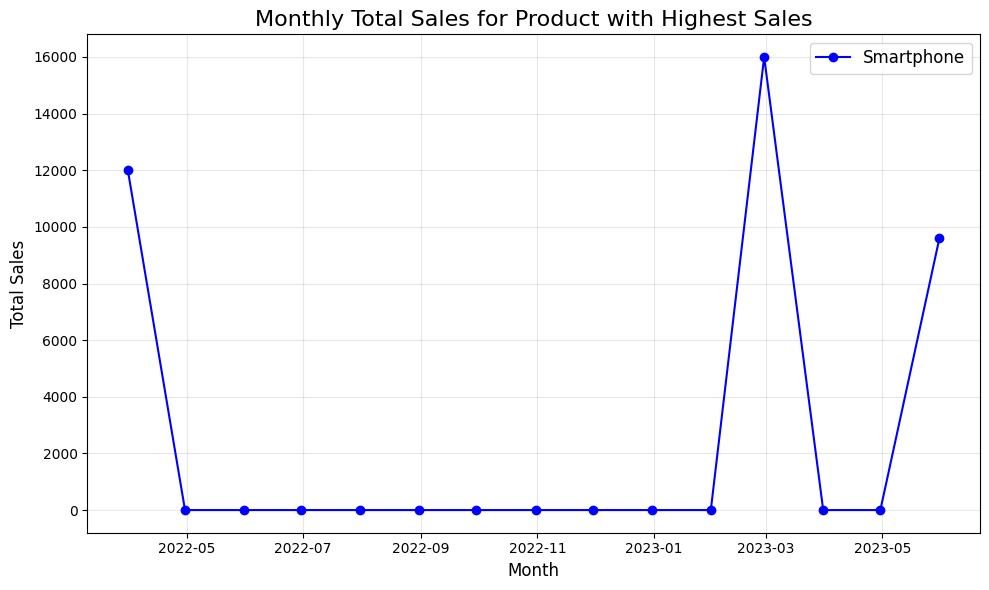

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both sheets
sheet1 = pd.read_excel('sales_data.xlsx', sheet_name=0)
sheet2 = pd.read_excel('sales_data.xlsx', sheet_name=1)

# Combine the sheets
df_combined = pd.concat([sheet1, sheet2], ignore_index=True)

# Add a new column 'TotalSales'
df_combined['TotalSales'] = df_combined['Quantity'] * df_combined['UnitPrice']

# Find the top 5 products with the highest total sales
product_sales = df_combined.groupby('Product')['TotalSales'].sum()
top_5_products = product_sales.sort_values(ascending=False).head(5)
print("Top 5 products with the highest total sales:\n", top_5_products)

# Plot the monthly sales of the top product
top_product = top_5_products.idxmax()
top_product_data = df_combined[df_combined['Product'] == top_product]
top_product_data['Date'] = pd.to_datetime(top_product_data['Date'])
monthly_sales = top_product_data.resample('M', on='Date')['TotalSales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label=top_product, color='blue')
plt.title('Monthly Total Sales for Product with Highest Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()